# PHYS20762 - Project 2

Ellis Huntley<br>
University of Manchester<br>
March 2022

In this project, a mass-spring system was studied, both with and without being subjected to an external driving force. Four different numerical methods were compared to the analytical solution via their displacements, velocities, and energies as functions of time, and the most accurate method was determined. 
    
Next, it was investigated how the system reponded to a variety of different damping factors. Each case of damping (critical, light and heavy damping) was demonstrated using the most accurate numerical method.
    
Finally, a driving force was added to the system and its effects were investigated. Four types of forces were used in this section, namely a sinusoidal wave, a sudden 'push' applied at different times, a square wave and a sawtooth wave. The response of the amplitude of oscillation to sinusoidal driving forces at different frequencies was also demonstrated.

In [1]:
#initialisation
import string
from math import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.stats as stats

plt.rcParams.update({'font.size': 14})
plt.style.use('default')

## Analytic Solution
Used to evaluate how well the different numerical techniques compare to the real solution.

/Users/ellishuntley/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


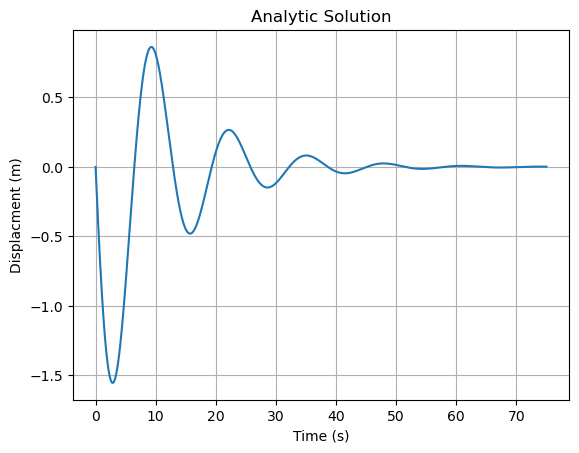

In [2]:
#Enter physical parameters
k = 1.35 #spring constant
m = 5.48 #mass
b =  1 #damping factor - this is selected arbitrarily at this point, different values of b is investiagted later.
T = 75 #Integral length (s)

#An array of step sizes is used so the effectiveness of this method can be evaluated for a variety of steps.
h = np.array([0.001, 0.01, 0.1, 0.5])

def ana_solution(k, m, b, T, h, x0, v0):
    """
    Calculates the displacement of an oscillating mass-spring system via the analytic solution
    
    args:
    k - float
    m - float
    b - float
    T - int
    h - float
    x0 - float
    
    
    returns:
    x - array
    
    """
    T = np.arange(0, np.max(T), h)
    A = (b/(2*1j*np.sqrt(4*k*m-b**2))+1/2)*x0+v0*m/(np.sqrt(4*k*m-b**2)*1j)
    B = x0 - A
    x = np.exp(-b*T/(2*m))*(A*np.exp(1j*np.sqrt(4*k*m-b**2)*T/(2*m))+B*np.exp(-1j*np.sqrt(4*k*m-b**2)*T/(2*m)))
    return x

def ana_velocity(k, m, b, T, h, x0, v0):
    """
    Calculates the velocity of an oscillating mass-spring system via the analytic solution
    
    args:
    k - float
    m - float
    b - float
    T - int
    h - float
    x0 - float
    
    returns:
    v - array
    
     """
    alpha = -b/(2*m)
    beta = np.sqrt(4*k*m - (b**2))/(2*m)
    
    A = (b/(2*1j*np.sqrt(4*k*m-(b**2)))+1/2)*x0+v0*m/(np.sqrt(4*k*m-(b**2))*1j)
    B = x0 - A
    T = np.arange(0,T,h)
    v = ((alpha+(1j*beta))*A*np.exp((alpha+(1j*beta))*T))+((alpha-(1j*beta))*B*np.exp((alpha-(1j*beta))*T))
    return v

#display analytic solution

fig = plt.figure()
ax = fig.add_subplot(111)

ana_x = ana_solution(k, m, b, T, h[0], 0, -1)
ax.plot(np.arange(0, np.max(T), h[0]), ana_x)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Displacment (m)')
ax.set_title('Analytic Solution')
ax.grid()
plt.show()

## Euler's Method
Euler's method is:
$$x_{i+1} = x_{i} + hv_{i}$$ 
$$v_{i+1} = v_{i} + ha_{i}$$  
This will be used to solve (first), the mass-spring system with no driving force.
All step sizes used were less than 1, as anything equal to or greater than 1 will cause the displacement to diverge. This can be seen in the formula above.

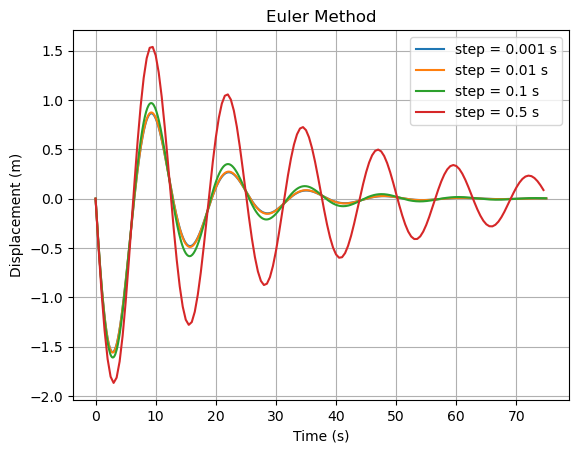

In [3]:
def euler_method(k, m, b, T, h):
    """
    Calculates the displacement and velocity via Euler's method
    
    args:
    k - float
    m - float
    b - float
    T - int
    h - float
    
    returns:
    x - array
    v - array
    
    """
    #Step total
    nsteps = int(T/h)
    
    #empty array for x,v values
    x = np.zeros(nsteps)
    v = np.zeros(nsteps)
    
    #initial conditions
    x[0] = 0
    v[0] = -1

    for i in range(nsteps-1):
        a = -(k/m)*x[i] - (b/m)*v[i]
        #calculate next step
        x[i+1] = x[i] + v[i]*h
        v[i+1] = v[i] + a*h
    return x,v

x_master = []

#create plot
fig = plt.figure()
ax = fig.add_subplot(111)

#iterate through different step sizes
for hstep in h:
    x = euler_method(k, m, b, T, hstep)[0]
    x_master.append(x)
    
    #plot each outcome
    ax.plot(np.arange(0, T, hstep), x, label='step = {} s'.format(hstep))
    
#label graph
ax.legend()
ax.grid()
ax.set_ylabel('Displacement (m)')
ax.set_xlabel('Time (s)')
ax.set_title('Euler Method')
plt.show()

## Euler's Method Comparison
Compares Euler's Method to the analytic solution, thus testing it's accuracy. Subtracting the two functions and plotting against time will show how much the two deviate between t=0 and t=T. 

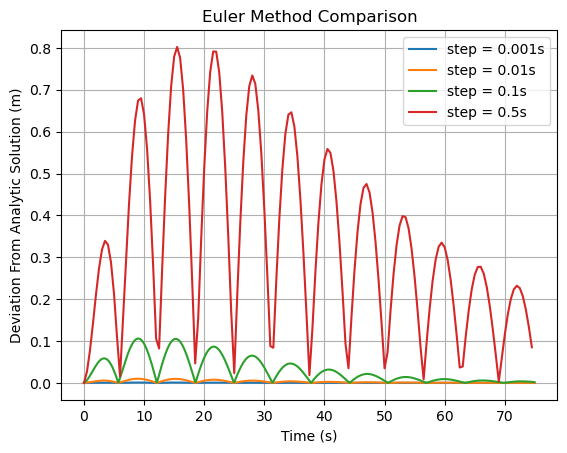

In [4]:
#calculate the differences
def comparison(ana, x):
    """
    Calculates the difference between the numerical method and analytic solution.
    
    args:
    ana - array
    x - array
    
    returns:
    comp - array
    
    """
    comp = np.abs(ana - x)
    return comp

#create plot
fig = plt.figure()
ax = fig.add_subplot(111)


for i, hstep in enumerate(h):
    
    comp = comparison(ana_solution(k, m, b, T, hstep, 0, -1), x_master[i])
    
    ax.plot(np.arange(0, T, hstep), comp, label='step = {}s'.format(hstep))

ax.legend()
ax.grid()
ax.set_title('Euler Method Comparison')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Deviation From Analytic Solution (m)')
plt.show()

As expected, the iterative function maps to the analytic function more closely when the time interval (h) is small. The difference between the analytic solution and numerical method with step size of h=0.5 is sometimes non zero at points where it should be. This is due to the step size being so large that it skips points entirely or continues in trajectory that deviates significantly from the analytic solution, i.e. its pass through equilibrium at a time does not always coincide with the analytic solution. It also takes a greater time to converge to 0 displacement. The smaller step sizes, while still deviating from the analytic solution, do not have this issue.

The error in this method is of order of the step size used, which is a rather large error, suggesting that this method will not be the most accurate of the methods used in this project.

## Improved Euler Method

In the Improved Euler Method, an etxra term from the Taylor expansion of x(t+h) is added. It is now:
$$x_{i+1} = x_{i} + hv_{i} + \frac{h^{2}}{2}a_{i}$$
$$v_{i+1} = v_{i} + ha_{i}$$  

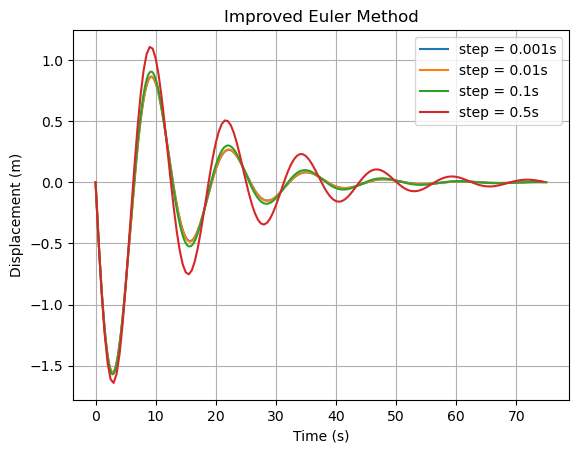

In [5]:
def improved_euler_method(k, m, b, T, h):
    """
    Calculates the displacement and velocity via the Improved Euler's method
    
    args:
    k - float
    m - float
    b - float
    T - int
    h - float
    
    returns:
    x - array
    v - array
    
    """
    #Step total
    nsteps = int(T/h)
    #empty array for x,v values
    x = np.zeros(nsteps)
    v = np.zeros(nsteps)
    #initial conditions
    x[0] = 0
    v[0] = -1

    for i in range(nsteps-1):
        a = -(k/m)*x[i] - (b/m)*v[i]
        #calculate next step
        x[i+1] = x[i] + v[i]*h + ((h**2)/2)*a
        v[i+1] = v[i] + a*h
    return x,v

x_master = []

#create plot
fig = plt.figure()
ax = fig.add_subplot(111)

for hstep in h:
    #iterate through different step sizes
    x = improved_euler_method(k, m, b, T, hstep)[0]
    x_master.append(x)
    
    #plot each outcome
    plt.plot(np.arange(0, T, hstep), x, label='step = {}s'.format(hstep))
    
#label graph
ax.legend()
ax.grid()
ax.set_ylabel('Displacement (m)')
ax.set_xlabel('Time (s)')
ax.set_title('Improved Euler Method')
plt.show()

## Improved Euler's Method Comparison
Compares Improved Euler's Method to the analytic solution. 

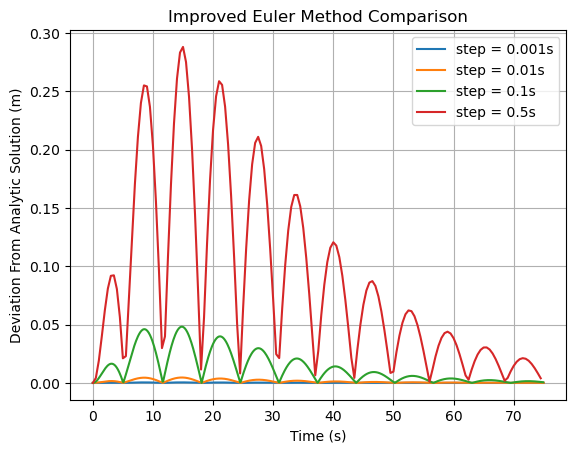

In [6]:
#create plot
fig = plt.figure()
ax = fig.add_subplot(111)

for i, hstep in enumerate(h):
    
    comp = comparison(ana_solution(k, m, b, T, hstep, 0, -1), x_master[i])
    
    plt.plot(np.arange(0, T, hstep), comp, label='step = {}s'.format(hstep))




#label and display
ax.legend()
ax.grid()
ax.set_title('Improved Euler Method Comparison')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Deviation From Analytic Solution (m)')
plt.show()

Yet again, the largest deviations arise from larger interval steps, but this time their magnitudes are smaller. The Improved Euler Method fits the analytic solution much better than the regular Euler Method. The largest step size, h=0.5, shown by the red line, suffers from the same issue as discussed in the Euler's Method comparison section - it does not pass through equilibrium at the same time as the analytic solution, or the smaller step sized numerical solutions.

The errors of this method are of order $h^{3}$, making it more accurate than the Euler Method.

## Verlet's Method

Verlet's Method is 
$$x_{i+1} = Ax_{i} + Bx_{i-1}$$
where
$$A = 2\frac{2m-kh{^2}}{D}$$  
$$B=\frac{bh-2m}{D}$$  
$$D=2m+bh$$

It can be seen that Verlet's Method uses both the current and the previous terms in order to calculate the next term. Therefore, in order to begin the iterative process, the first term must be calculated by another method. The Improved Euler Method will be used here, as it has been demonstrated to be the most accurate numerical solution used so far.

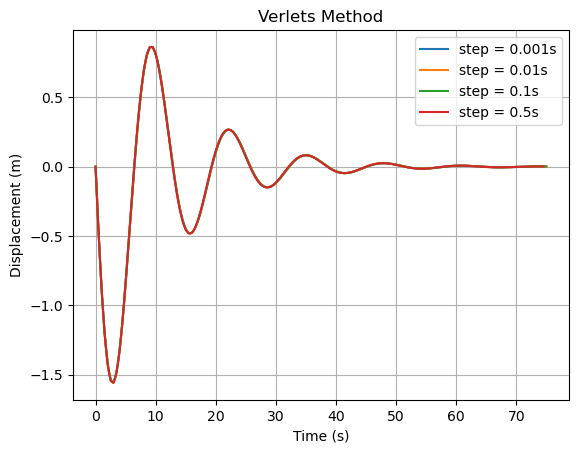

In [7]:
def verlet_method(k, m, b, T, h):
    """
    Calculates the displacement and velocity via the Verlet method
    
    args:
    k - float
    m - float
    b - float
    T - int
    h - float
    
    returns:
    x - array
    v - array
    
    """
    #Step total
    nsteps = int(T/h)
    #empty array for x, v values
    x = np.zeros(nsteps)
    v = np.zeros(nsteps)
    #initial conditions
    x[0] = 0
    v[0] = -1
    #first term calculation via improved euler method
    a = -(k/m)*x[0] - (b/m)*v[0]
    x[1] = x[0] + v[0]*h + ((h**2)/2)*a
    v[1] = v[0] + a*h
    #verlets method
    D = 2*m+b*h
    A = 2*(2*m -k*h**2)/D
    B = (b*h-2*m)/D
    for i in range(1,nsteps-1):
        x[i+1] = A*x[i] + B*x[i-1]
        v[i] = (x[i+1]-x[i-1])/(2*h)
    return x,v

x_master = []

#create plot
fig = plt.figure()
ax = fig.add_subplot(111)

for hstep in h:
    #iterate through different step sizes
    
    x = verlet_method(k, m, b, T, hstep)[0]
    x_master.append(x)
    
    #plot each outcome
    ax.plot(np.arange(0, T, hstep), x, label='step = {}s'.format(hstep))
    
#label graph
ax.legend()
ax.grid()
ax.set_ylabel('Displacement (m)')
ax.set_xlabel('Time (s)')
ax.set_title('Verlets Method')

plt.show()

## Verlet's Method Comparison

Compares Verlet's Method to the analytic solution.

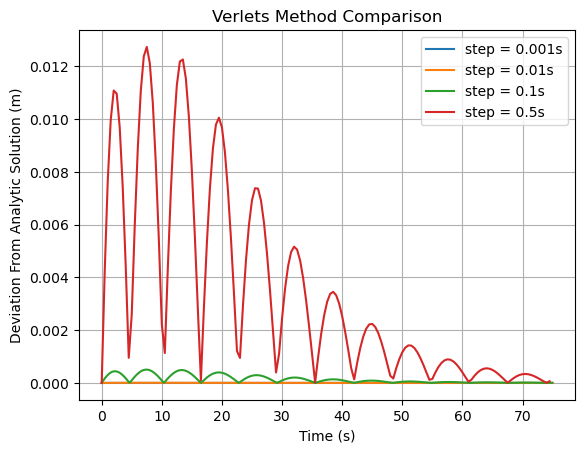

In [8]:
#create plot
fig = plt.figure()
ax = fig.add_subplot(111)

for i, hstep in enumerate(h):
    
    comp = comparison(ana_solution(k, m, b, T, hstep, 0, -1), x_master[i])
    
    ax.plot(np.arange(0, T, hstep), comp, label='step = {}s'.format(hstep))


ax.legend()
ax.grid()
ax.set_title('Verlets Method Comparison')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Deviation From Analytic Solution (m)')
plt.show()

It can be seen that this method deviates even less from the analytic solution than previous methods. The largest deviation in the largest step size is approximately 0.013. The order of error in this method is $h^{4}$, which is why it is the most accurate method used so far. This method is also known as a symplectic integrator, meaning it preserves energy correctly. It does this at no significant additional computational cost over that of the simple Euler Method for example, so is a natural choice for best numerical method thus far.

## Euler-Cromer Method

This is similar to the Euler Method, except the velocity term in displacement is no longer the ith term, and instead the (i+1)th term. This can be seen below:
$$x_{i+1} = x_{i} + hv_{i+1}$$ 
$$v_{i+1} = v_{i} - \frac {hk}{m} x_{i}$$  


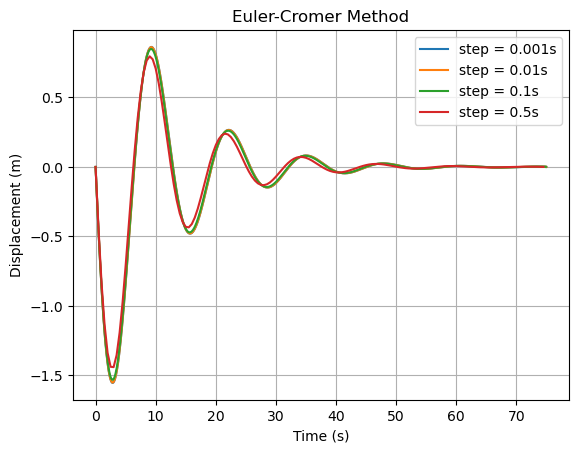

In [9]:
def euler_cromer(k, m, b, T, h):
    """
    Calculates the displacement and velocity via the Euler-Cromer method.
    
    args:
    k - float
    m - float
    b - float
    T - int
    h - float
    
    returns:
    x - array
    v - array
    
    """
    #Step total
    nsteps = int(T/h)
    #empty array for x,v values
    x = np.zeros(nsteps)
    v = np.zeros(nsteps)
    #initial conditions
    x[0] = 0
    v[0] = -1
    #euler-cromer method
    for i in range(1, nsteps-1):
        v[i] = v[i-1] - (h*k/m)*x[i-1] - (b*h/m)*v[i-1]
        x[i] = x[i-1] + h*v[i]
        
    return x,v

x_master = []

#create plot
fig = plt.figure()
ax = fig.add_subplot(111)


for hstep in h:
    #iterate through different step sizes
    
    x = euler_cromer(k, m, b, T, hstep)[0]
    x_master.append(x)
    
    #plot each outcome
    ax.plot(np.arange(0, T, hstep), x, label='step = {}s'.format(hstep))
    
#label and display graph


ax.legend()
ax.grid()
ax.set_ylabel('Displacement (m)')
ax.set_xlabel('Time (s)')
ax.set_title('Euler-Cromer Method')
plt.show()

## Euler-Cromer Comparison
Compares Euler-Cromer to the analytic solution.

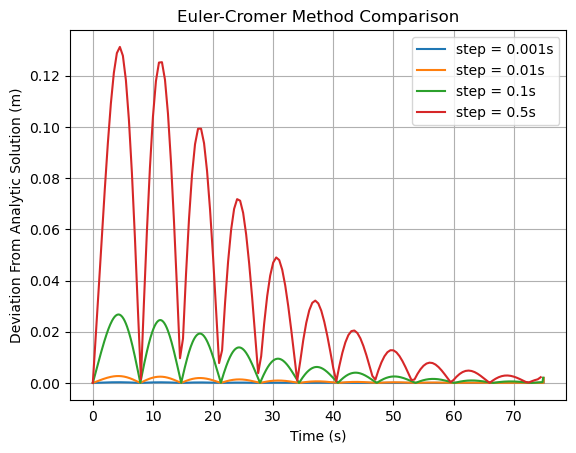

In [10]:
#create plot
fig = plt.figure()
ax = fig.add_subplot(111)

for i, hstep in enumerate(h):
    
    comp = comparison(ana_solution(k, m, b, T, hstep, 0, -1), x_master[i])
    
    ax.plot(np.arange(0, T, hstep), comp, label='step = {}s'.format(hstep))
    
ax.legend()
ax.grid()
ax.set_title('Euler-Cromer Method Comparison')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Deviation From Analytic Solution (m)')
plt.show()

The Euler-Cromer method is a first-order integrator, just as the standard Euler method. This means that it commits a global error of the order of $h$. However, it is a symplectic integrator, unlike the standard method. The standard method predicts a steadily increasing energy, which is unphysical. This method resolves that issue making it much more accurate. It can be seen in the figure above that only the Verlet method deviates from the analytic solution less than this method. Despite this, the smaller step sizes in Euler-Cromer are still sufficently accurate for any calculations on this scale, and so this method would still be appropriate to use. 

## Further Sources of Error

To represent a floating-point number in binary, a computer may require a non-terminating sequence of 0s and 1s. Naturally the computer will only store a finite amount of digits. Storing a float in 32 bits is known as single precision, and in 64 bits is known as double precision. Python interprets any decimal as a double precision float, and thus is accurate to approximately 16 decimal places. This is more than sufficient for the values used in this project and so these errors can be neglected.

This leads on to the rounding error when calculating derivatives. This is how much the actual derivative deviates from the numerical method. Intuitively, using a smaller step size ($h$) will help reduce this error, but this is only true up to a point. The optimum value of $h$ is often ~$10^{-8}.$ After this point, the error will begin to increase as it exceeds the accuracy of the stored number, and now the deviation between numerical and analytical will begin to increase. 

In this project, a range of step sizes were used to show the impact of using the smaller step sizes on accuracy. The smallest step size used is 0.001. This was carefully selected as it balances accuracy and compuational cost. Using the smaller step size would be more accurate (up to ~$10^{-8}$) but this would quickly become too computationally expensive and would take too long to run. The smallest $h$ used here runs very well and, as seen in all of the deviation plots above, has an unresolvable difference between it and the analytic solution, therefore we can still consider it to be sufficiently accurate in this project. 

Now that all numerical methods have been compared for a range of steps, the step size of 0.001 will be used for the remainder of the project, unless stated otherwise.

## Comparing Energies
Evaluates and compares the energies of each method with analytic energy. The energy of an driven and damped oscillator is given by:

   $$E(t) = E_{0}\exp\bigg(-{\frac{b}{m}t}\bigg).$$
   
It can be seen in the equation above that in the limit of no damping, total energy will be constant, as expected.

/Users/ellishuntley/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


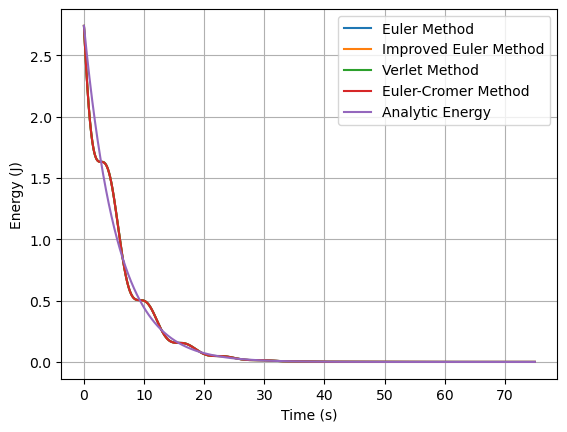

In [11]:
#use smallest step size to compare energies
hstep = np.min(h)

#time array
time_arr = np.arange(0,T,hstep)
#energy functions
def method_energy(method):
    """
    Calculates the energies for the inputted method
    
    args:
    method - array
    
    returns:
    E - array
    """
    #assign displacement and velocity arrays
    x = method[0]
    v = method[1]
    
    #calculate kinetic energy + potential energy
    E = 0.5*m*v**2 + 0.5*k*x**2
    
    return E


def analytic_energy(analytic_x, analytic_v):
    """
    Uses the analytic solution to calculate the energy.
    
    args:
    analytic_x - array
    analytic_v - array
    
    returns:
    E - array
    
    """
    #initial energy
    x_initial = analytic_x[0]
    v_initial = analytic_v[0]
    E_initial = 0.5*m*v_initial**2 + 0.5*k*x_initial**2
    
    #energy decay
    E = E_initial*np.exp(-(b/m)*np.arange(0, T, hstep))
    
    return E
    
#calculate energies for methods used
E_euler = method_energy(euler_method(k, m, b, T, hstep))
E_imp_euler = method_energy(improved_euler_method(k, m, b, T, hstep))
E_verlet = method_energy(verlet_method(k, m, b, T, hstep))
E_ec = method_energy(euler_cromer(k, m, b, T, hstep))
E_ana = analytic_energy(ana_solution(k, m, b, T, hstep, 0, -1), ana_velocity(k, m, b, T, hstep, 0, -1))

#plot results      

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(time_arr, E_euler, label='Euler Method')
ax.plot(time_arr, E_imp_euler, label='Improved Euler Method') 
ax.plot(time_arr, E_verlet, label='Verlet Method')
ax.plot(time_arr, E_ec, label='Euler-Cromer Method')
ax.plot(time_arr, E_ana, label='Analytic Energy')

#label plots
ax.set_xlabel('Time (s)')
ax.set_ylabel('Energy (J)')
ax.legend()
ax.grid()
plt.show()

It can be seen in the figure above that each numerical energy curve closely follow each other. It has been determined already that Verlet and Euler-Cromer are more accurate than the others, and so the unresolvable difference between each energy curve is due to the small step size of 0.001, and not each method being equally accurate. This does suggest, however, that given a small enough step size, any method will provide a reliable result on this scale.

The analytic energy curve is a decaying exponential whereas the numerical solution follows a similar curve, but appears to oscillate about the analytic solution - this is due to the steps taken during the derivation of the analytic solution. The solution used is in the weak damping limit, and in reality it is modulated by an extra cosine term that was previously neglected. This modulation explains the deviations in the numerical solutions, and in this case the numerical is more accurate that the analytic.

## Comparing Damping Factors

The effects of changing the damping factor will be investigated here. The critical damping is 

$$b_{cr}{^2} = 4km.$$

The most accurate method was found to be Verlet's Method, so that will be used here.

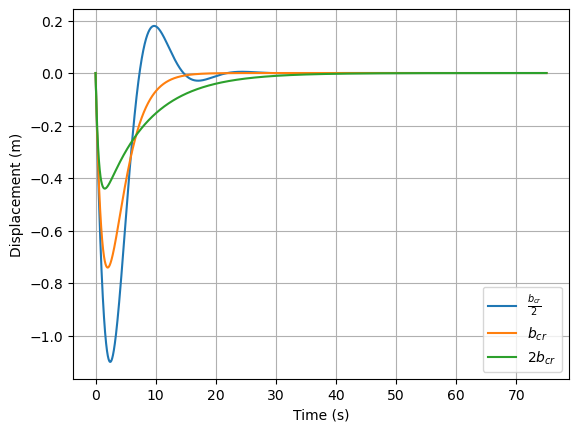

In [12]:
#create plot
fig = plt.figure()
ax = fig.add_subplot(111)

#define critical value and others values to be used
b_cr = np.sqrt(4*k*m)
b_values = np.array([b_cr/2, b_cr, 2*b_cr])
labels = [r'$\frac{b_{cr}}{2}$',r'$b_{cr}$',r'$2b_{cr}$']

#use Verlets Method for each b
for i, b_temp in enumerate(b_values):
    x = verlet_method(k, m, b_temp, T, hstep)[0]
    ax.plot(time_arr, x, label='{}'.format(labels[i]))

#label and display
ax.set_xlabel('Time (s)')
ax.set_ylabel('Displacement (m)')
ax.legend()
ax.grid()
plt.show()

When the damping factor, b, is equal to the critical damping factor, the oscillating mass will return to equilibrium as quickly as possible and will no longer oscillate. When b is less than the critical factor, we will see light damping, this what has been observed thus far - oscilltions about equalibrium with a gradual reduction in amplitude. A value of b that is greater than the critical value will yield heavy damping, which corresponds to returning equalibirum with no further oscillations but in a time greater than that of critical damping. Each case can seen in the figure above.

## Driving Forces

We will examine how the mass-spring system responds to an external force. The forces used in this section will be a short pulse at a given time and sinusoidal force. Throughout these next sections, all forces will be scaled so that their maximum is at 1 N, allowing for them to be compared more easily.

In [13]:
#sinusoidal force function
def sinusoidal_force(time_arr, frequency, f0):
    """
    Creates a sinusoidal force to be used for driving.
    
    args:
    time_arr - array
    frequency - float
    f0 - float
    
    returns:
    forces - array
    
    """
    
    forces = f0*np.cos(frequency*time_arr)

    return forces

sinusoidal_forces = sinusoidal_force(time_arr, 0.1, 1)

#the pulse force here will be modelled by a gaussian curve
def pulse_force(time_arr, mu, sigma):
    """
    Creates a sinusoidal force to be used for driving.
    
    args:
    time_arr - array
    mu - float
    sigma - float
    
    returns:
    forces - array
    
    """
    
    forces = stats.norm.pdf(time_arr, mu, sigma)
    return forces


## Oscillations with Sinusoidal Force

Using the Euler-Cromer Method, as it is the sufficiently accurate and easiest to adjust for additional forces, we can analyse how the damped mass-spring system would behave when subjected to an external driving force. The equations now include an extra term to account for this:

$$x_{i+1} = x_{i} + hv_{i+1}$$ 
$$v_{i+1} = v_{i} - \frac {hk}{m} x_{i} + hF_{i}$$

In this case, we will explore how the system responds to a force of form

$$F=F_{0}cos(\omega t).$$

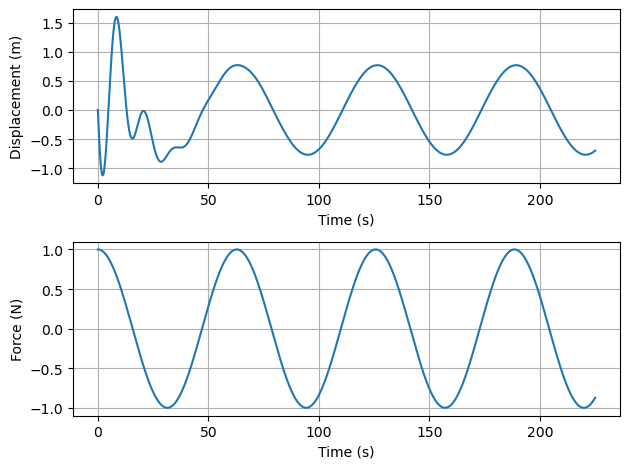

In [14]:
def driven_euler_cromer(k, m, b, T, h, forces):
    """
    Calculates the displacement and velocity of a driven oscillator via the Euler-Cromer method.
    
    args:
    k - float
    m - float
    b - float
    T - int
    h - float
    forces - array
    
    returns:
    x - array
    v - array
    
    """
    #Step total
    nsteps = int(T/h)
    
    #empty array for x,v values
    x = np.zeros(nsteps)
    v = np.zeros(nsteps)
    
    #initial conditions
    x[0] = 0
    v[0] = -1
    
    #euler-cromer method for driven oscillator
    for i in range(1, nsteps):
        v[i] = v[i-1] - (h*k/m)*x[i-1] - (b*h/m)*v[i-1] +(h*forces[i-1])/m
        x[i] = x[i-1] + h*v[i]
        
    return x,v

#calculate over a long period of time to show oscillation after transient period
long_time_arr = np.arange(0, 3*T, hstep)

sinF_x = driven_euler_cromer(k, m, b, 3*T, hstep, sinusoidal_force(long_time_arr, 0.1, 1))[0]

fig, axs = plt.subplots(2)



axs[0].plot(long_time_arr, sinF_x) 
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Displacement (m)')
axs[0].grid()

axs[1].plot(long_time_arr, sinusoidal_force(long_time_arr, 0.1, 1))
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Force (N)')
axs[1].grid()

fig.tight_layout()
plt.show()

It can be seen in the first figure how the mass-spring system behaves when subject to a periodic driving force. The initial part of the curve is the transient period, showing how the system responds during the time it takes to reach its steady state. Once this period has passed, at approximately $t$ = 50 s, the mass oscillates with the same frequency as the driving force. In this section it was nessecary to extend the time over which displacment was calculated to properly demonstrate the steady state of the solution.

## Oscillations with a Pulse Force

The Euler-Cromer method from the previous section will be used here. In this case the force applied will be a 'push', modelled by a Gaussian curve.

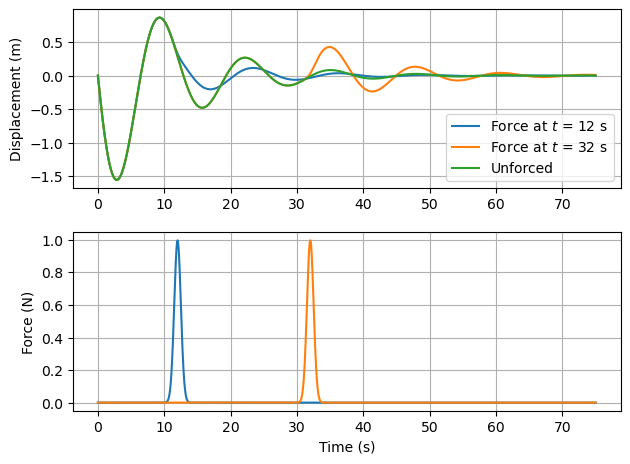

In [15]:
#different times for force to be exerted
force_times = np.array([12, 32])
#calculate and plot displacment for each force

fig, axs = plt.subplots(2)

axs[0].set_ylabel('Displacement (m)')
axs[0].grid()

plt.xlabel('Time (s)')
axs[1].set_ylabel('Force (N)')
axs[1].grid()
    
fig.tight_layout()


for i, time in enumerate(force_times):
    pulseF_x = driven_euler_cromer(k, m, b, T, hstep, 1.25*pulse_force(time_arr, force_times[i], 0.5))[0]

    axs[0].plot(time_arr, pulseF_x, label=r'Force at $t$ = {} s'.format(time)) 
    
    axs[1].plot(time_arr, 1.25*pulse_force(time_arr, force_times[i], 0.5))


axs[0].plot(time_arr, euler_cromer(k, m, b, T, hstep)[0], label='Unforced')    
axs[0].legend()
plt.show()

The same 'push' force has been applied at two different times here. The first is applied at $t$= 12 s and has an opposite sign to the mass' velcoity and thus works against it, causing a sharp change in direction and causing it to return to equalibrium quicker. The second force is applied at $t$= 32 s, which now has the same sign as the mass' velocity. This causes the mass to move even further from equalibrium that it would normally and increasing its energy. This mass now takes longer to decay to 0 than it otherwise would, as seen in the figure above.

In both cases, after the system is subject to this force it continues oscillating as one would expect from a damped system, and eventually decays to equilibrium.

## Amplitude Response for the Oscillatory Driving Force

Investigates how the amplitude of the oscillator with a sinusoidal driving force responds to varying force frequencies. The analytic amplitude response function is: 

$$A(\omega)=\frac{F_{0}/m}{\sqrt{(\omega_{0}^{2}-\omega^{2})+\omega^{2}\gamma{2}}}$$

which will be used to compare and evaluate the accuracy of the Euler-Cromer Method.

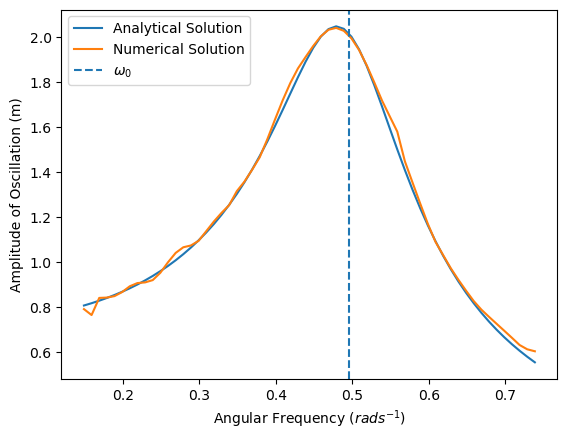

In [16]:
def analytic_amplitude_function(k, m, b, F_0, hstep):
    """
    Calculates the natural frequency and the amplitude of a driven oscillator using the analytic solution. Also 
    calculates a frequency range over which the sinuoisdal force will be applied.
    
    args:
    k - float
    m - float
    b - float
    F_0 - float
    hstep - float
    
    returns:
    amplitudes - array
    frequencies - array
    natural_freq - float
    """
    #calculate natural frequency
    natural_freq = np.sqrt(k/m)    
    #create array of frequencies to plot
    frequencies = np.arange(0.3*natural_freq, 1.5*natural_freq, hstep)
    #amplitude response function
    amplitudes = (F_0/m) / (np.sqrt(((natural_freq**2 - frequencies**2)**2) + (frequencies**2)*((b/m)**2)))
    return amplitudes, frequencies, natural_freq

analytic_amplitudes, frequencies, natural_freq = analytic_amplitude_function(k, m, b, 1, 0.01)





def numerical_amplitude(frequencies, time_arr):
    """
    calculates the amplitudes of oscillations after the transient period for a driven force with 
    different frequencies.
    
    args:
    frequencies - array
    time_arr - array
    
    returns:
    amplitudes - array
    
    
    """
    amplitudes = np.zeros(len(frequencies))
    starting_index = len(time_arr)//2 #allows enough time to pass for system to reach steady state
    for i, frequency in enumerate(frequencies):
        x = driven_euler_cromer(k, m, b, T, hstep, sinusoidal_force(time_arr, frequency, 1))[0]
        stable_x = x[starting_index:]
        amplitudes[i] = np.amax(stable_x)
        
    return amplitudes

numerical_amplitudes = numerical_amplitude(frequencies, time_arr)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(frequencies, analytic_amplitudes, label='Analytical Solution')
ax.plot(frequencies, numerical_amplitudes, label='Numerical Solution')

#plot and labels
ax.axvline(x=natural_freq, linestyle='--', label='$\omega_{0}$')
ax.legend()
ax.set_xlabel('Angular Frequency ($rads^{-1}$)')
ax.set_ylabel('Amplitude of Oscillation (m)')

plt.show()

The amplitude of the driven oscillator varies with the driving frequency. The peaks in each curve shows the maximum amplitude of the system, found at the natural frequency. Without damping, amplitude would tend to infinity at the natural frequency, shown by the dotted line, at which point the system resonates. With damping, only a maximum point exists - it does not go to infinity. The damping also causes the peaks to shift to the left of the natural frequency. The limits of the function are 

$$\lim_{\omega \to 0} A(\omega) = \frac{F_{0}}{m\omega_{0}^{2}}$$

$$\lim_{\omega \to \infty} A(\omega) = 0$$

which can be seen in the figure above.
The numerical solution follows the analytic solution closely, with only small deviations. The cause of this is that a larger step size was required for the method. The small step size used thus far was 0.001, but this becomes too computationally expensive for this type of calculation, and so was changed to 0.01 instead.

## Oscillations with a Square Wave Force

Using a Fourier series, we can analyse how the system responds to a force in the form of a square wave. The Fourier series of a square wave is 

$$ F(t) =\frac{4}{\pi}  \sum_{n=1,3,5...}^{\infty} \frac{1}{n}\sin{(n\omega t)}.$$



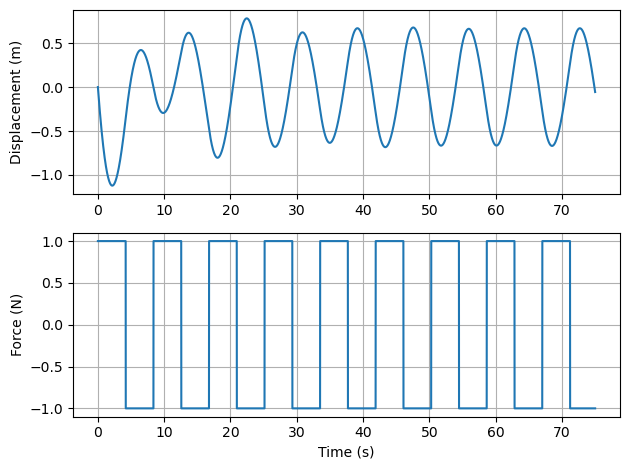

In [17]:
def square_wave(time):
    """
    Creates an array of forces in the form of a square wave.
    
    args:
    time - array
    
    returns:
    forces - array
    
    """
    
    
    forces = signal.square(0.75*time, duty=0.5) #used 0.75*time for less frequent force oscillations - easier to see
    return forces

square_forces = square_wave(time_arr)

fig, axs = plt.subplots(2)

axs[0].plot(time_arr, driven_euler_cromer(k, m, b, T, hstep, square_forces)[0]) 
axs[0].set_ylabel('Displacement (m)')
axs[0].grid()

axs[1].plot(time_arr, square_forces)
axs[1].set_ylabel('Force (N)')
axs[1].grid()

plt.xlabel('Time (s)')

fig.tight_layout()

plt.show()

The behaviour of this system is similar to that of the sinusoidal driving force system. The system undergoes a transient period in which it begins to settle and eventually reach its steady state. Its frequency then matches that of the square wave.

## Oscillations with a Sawtooth Wave Force

The final periodic driving force that will be investigated is the sawtooth function. The sawtooth function has a Fourier series of

$$ F(t) =-\frac{2}{\pi}\sum_{n=1,2,3...}^{\infty} \frac{(-1)^{n}}{n}\sin{(n\omega t)}.$$

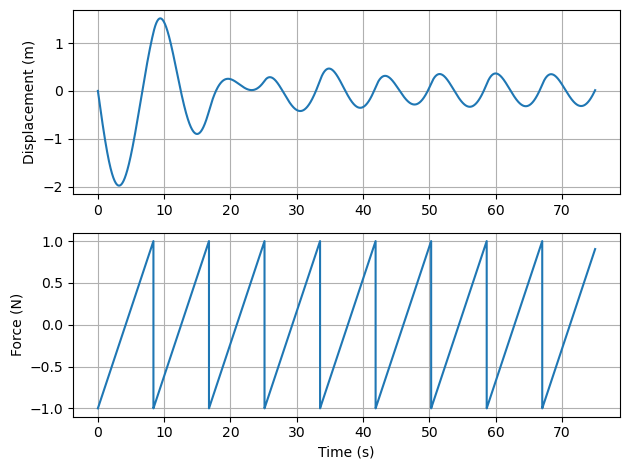

In [18]:
def sawtooth(time):
    """
    Creates an array of forces in the form of a sawtooth curve.
    
    args:
    time - array
    
    returns:
    forces - array
    
    """
    forces = signal.sawtooth(time)
    return forces

sawtooth_forces = sawtooth(0.75*time_arr)

fig, axs = plt.subplots(2)

axs[0].plot(time_arr, driven_euler_cromer(k, m, b, T, hstep, sawtooth_forces)[0]) 
axs[0].set_ylabel('Displacement (m)')
axs[0].grid()

axs[1].plot(time_arr, sawtooth_forces)
axs[1].set_ylabel('Force (N)')
axs[1].grid()

plt.xlabel('Time (s)')

fig.tight_layout()

plt.show()

Similar to the last two periodic forces, this system undergoes a transient period before reaching a steady state, this is appears to be a property of all periodic driving forces. Unlike the others however, this displacement does not plot a symmetrical curve, due to the asymmetry of the sawtooth function.